In [ ]:
# Setup environment
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ta
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get data
tickers = 'AMZN GOOG NFLX META GLD'.split()
tickers

['AMZN', 'GOOG', 'NFLX', 'META', 'GLD']

In [4]:
# Fetch historical market data
start = dt.datetime(2024, 1, 1)
end = dt.datetime(2025, 12, 31)
data = yf.download(tickers, start=start, end=end, auto_adjust=True)['Close']
data

[*********************100%***********************]  5 of 5 completed


Ticker            AMZN         GLD        GOOG        META         NFLX
Date                                                                   
2024-01-02  149.929993  190.720001  138.611435  344.168335   468.500000
2024-01-03  148.470001  189.130005  139.406006  342.359497   470.260010
2024-01-04  144.570007  189.320007  137.101776  344.993195   474.670013
2024-01-05  145.240005  189.350006  136.456177  349.793640   474.059998
2024-01-08  149.100006  187.869995  139.574860  356.462524   485.029999
...                ...         ...         ...         ...          ...
2025-09-25  218.149994  344.750000  246.570007  748.909973  1208.239990
2025-09-26  219.779999  346.739990  247.179993  743.750000  1210.609985
2025-09-29  222.169998  352.459991  244.360001  743.400024  1206.410034
2025-09-30  219.570007  355.470001  243.550003  734.380005  1198.920044
2025-10-01  220.630005  356.029999  245.539993  717.340027  1170.900024

[439 rows x 5 columns]

In [5]:
# Basic data description statistics
print(data.describe())
print(data.info())

Ticker        AMZN         GLD        GOOG        META         NFLX
count   439.000000  439.000000  439.000000  439.000000   439.000000
mean    197.090752  253.096446  173.776613  576.305771   855.730500
std      22.643252   43.713753   23.327895  105.307353   246.906023
min     144.570007  184.419998  131.659012  342.359497   468.500000
25%     180.055000  218.040001  159.663727  495.684937   634.015015
50%     192.169998  245.000000  170.075638  570.635681   823.960022
75%     219.375000  298.110001  185.015808  655.525665  1099.200012
max     242.059998  356.029999  255.240005  789.467163  1339.130005
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2024-01-02 to 2025-10-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    439 non-null    float64
 1   GLD     439 non-null    float64
 2   GOOG    439 non-null    float64
 3   META    439 non-null    float64
 4   NFLX    439 non-null    float64
dtypes

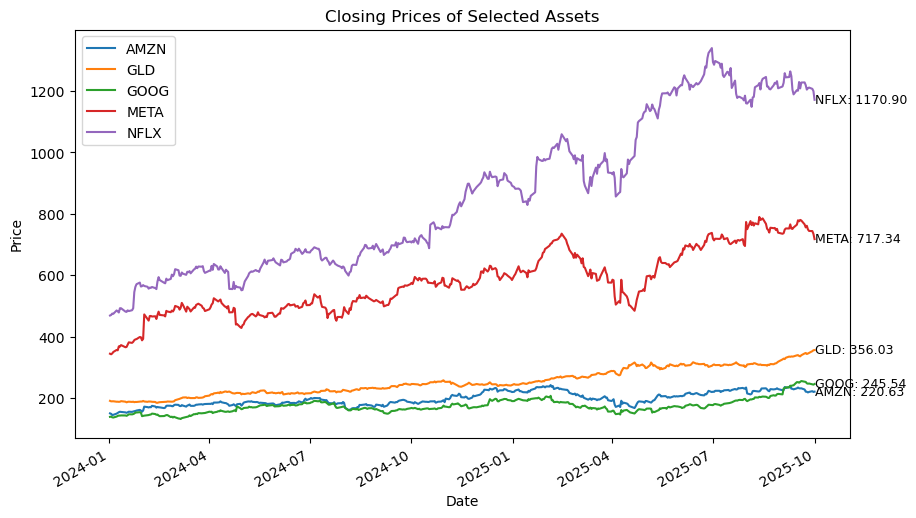

In [6]:
# Plot closing prices
data.plot(figsize=(10, 6))
plt.title('Closing Prices of Selected Assets')
# Display the ticker symbols and last closing prices in plot
for i, ticker in enumerate(tickers):
    plt.text(data.index[-1], data[ticker].iloc[-1], f'{ticker}: {data[ticker].iloc[-1]:.2f}', fontsize=9, verticalalignment='center')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

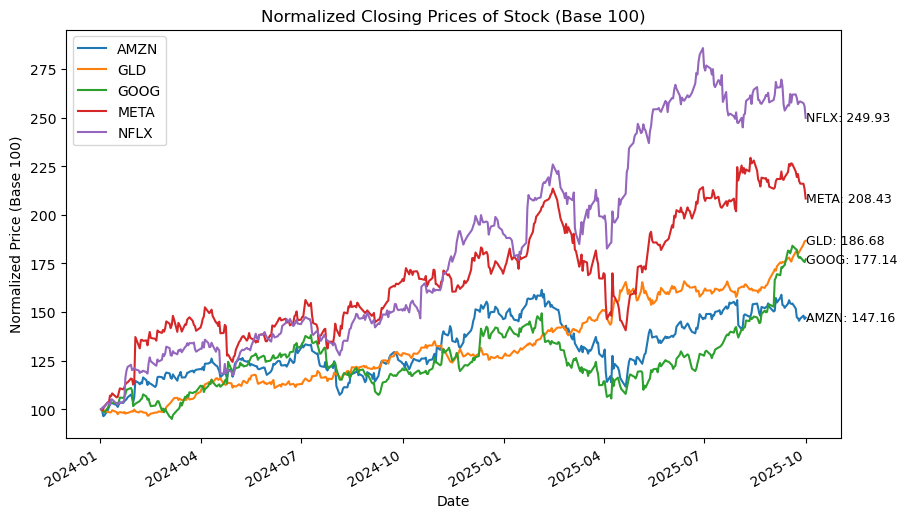

In [7]:
# Normalized prices
normalized_data = data / data.iloc[0] * 100
normalized_data.plot(figsize=(10, 6))
plt.title('Normalized Closing Prices of Stock (Base 100)')
for i, ticker in enumerate(tickers):
    plt.text(data.index[-1], normalized_data[ticker].iloc[-1], f'{ticker}: {normalized_data[ticker].iloc[-1]:.2f}', fontsize=9, verticalalignment='center')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend()
plt.show()

In [8]:
# Calculate log returns, about monetary returns need to compound the interests.
pct_change = np.log1p(data).diff().dropna()
pct_change

Ticker          AMZN       GLD      GOOG      META      NFLX
Date                                                        
2024-01-03 -0.009720 -0.008328  0.005675 -0.005254  0.003742
2024-01-04 -0.026439  0.000999 -0.016547  0.007641  0.009314
2024-01-05  0.004592  0.000158 -0.004686  0.013779 -0.001283
2024-01-08  0.026053 -0.007806  0.022435  0.018832  0.022829
2024-01-09  0.015010  0.000318  0.014241 -0.003426 -0.006067
...              ...       ...       ...       ...       ...
2025-09-25 -0.009356  0.004144 -0.005077 -0.015547  0.003554
2025-09-26  0.007410  0.005739  0.002461 -0.006905  0.001958
2025-09-29  0.010767  0.016315 -0.011428 -0.000470 -0.003472
2025-09-30 -0.011719  0.008480 -0.003307 -0.012191 -0.006223
2025-10-01  0.004794  0.001570  0.008104 -0.023444 -0.023629

[438 rows x 5 columns]

In [9]:
# Actual percentage change
changed = data.pct_change().dropna()
changed

Ticker          AMZN       GLD      GOOG      META      NFLX
Date                                                        
2024-01-03 -0.009738 -0.008337  0.005732 -0.005256  0.003757
2024-01-04 -0.026268  0.001005 -0.016529  0.007693  0.009378
2024-01-05  0.004634  0.000158 -0.004709  0.013915 -0.001285
2024-01-08  0.026577 -0.007816  0.022855  0.019065  0.023141
2024-01-09  0.015225  0.000319  0.014445 -0.003430 -0.006061
...              ...       ...       ...       ...       ...
2025-09-25 -0.009355  0.004165 -0.005084 -0.015447  0.003563
2025-09-26  0.007472  0.005772  0.002474 -0.006890  0.001962
2025-09-29  0.010875  0.016497 -0.011409 -0.000471 -0.003469
2025-09-30 -0.011703  0.008540 -0.003315 -0.012133 -0.006208
2025-10-01  0.004828  0.001575  0.008171 -0.023203 -0.023371

[438 rows x 5 columns]

In [10]:
# Describe percentage change
changed.describe()

Ticker        AMZN         GLD        GOOG        META        NFLX
count   438.000000  438.000000  438.000000  438.000000  438.000000
mean      0.001075    0.001479    0.001483    0.001953    0.002286
std       0.019661    0.010291    0.018866    0.023785    0.019702
min      -0.089791   -0.035683   -0.075061   -0.105613   -0.090933
25%      -0.009291   -0.004563   -0.008674   -0.009626   -0.007303
50%       0.000423    0.001918    0.003144    0.001087    0.002076
75%       0.012161    0.008190    0.011533    0.012064    0.013201
max       0.119770    0.036991    0.099652    0.203176    0.110870

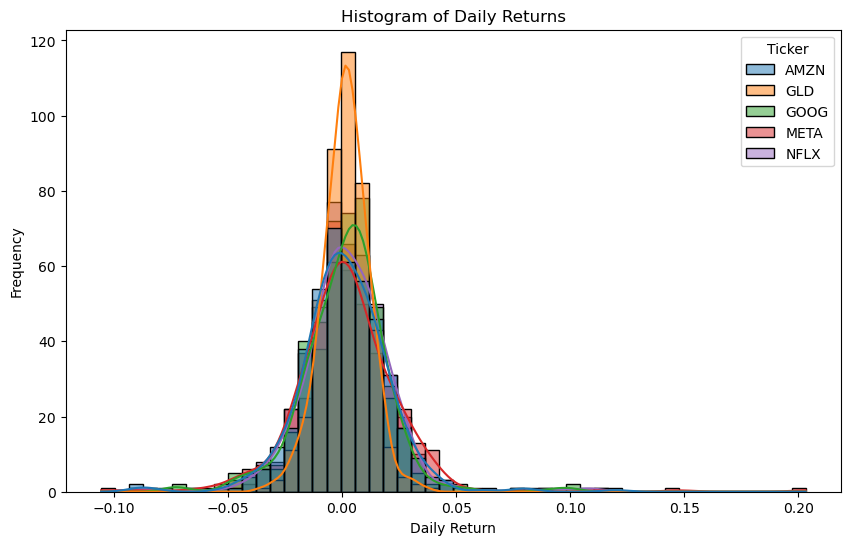

In [11]:
# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(changed, bins=50, kde=True, alpha=0.5)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

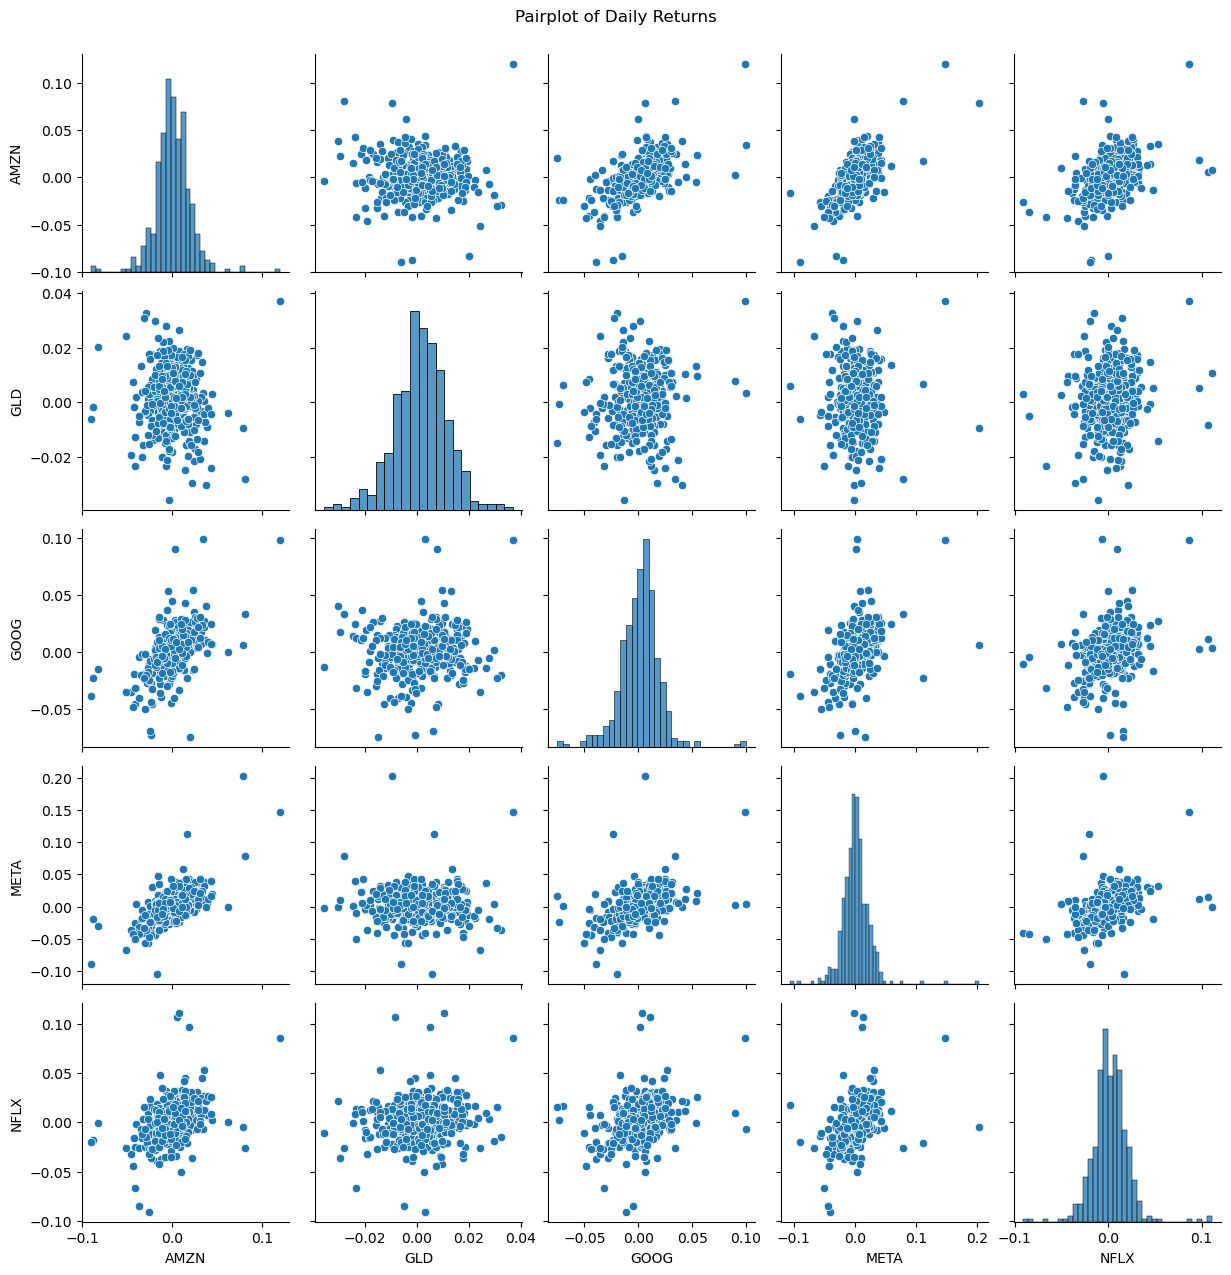

In [12]:
# Pairplot of daily returns
sns.pairplot(changed)
plt.suptitle('Pairplot of Daily Returns', y=1.02)
plt.show()

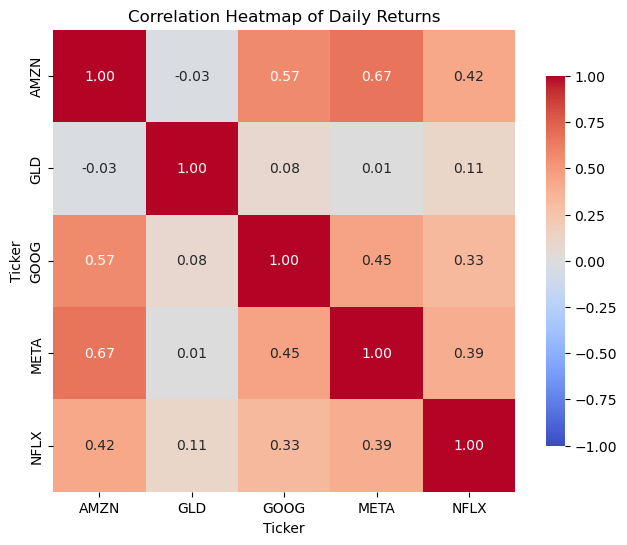

In [13]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(changed.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Daily Returns')
plt.show()

Techincal Analysis of Stock Prices

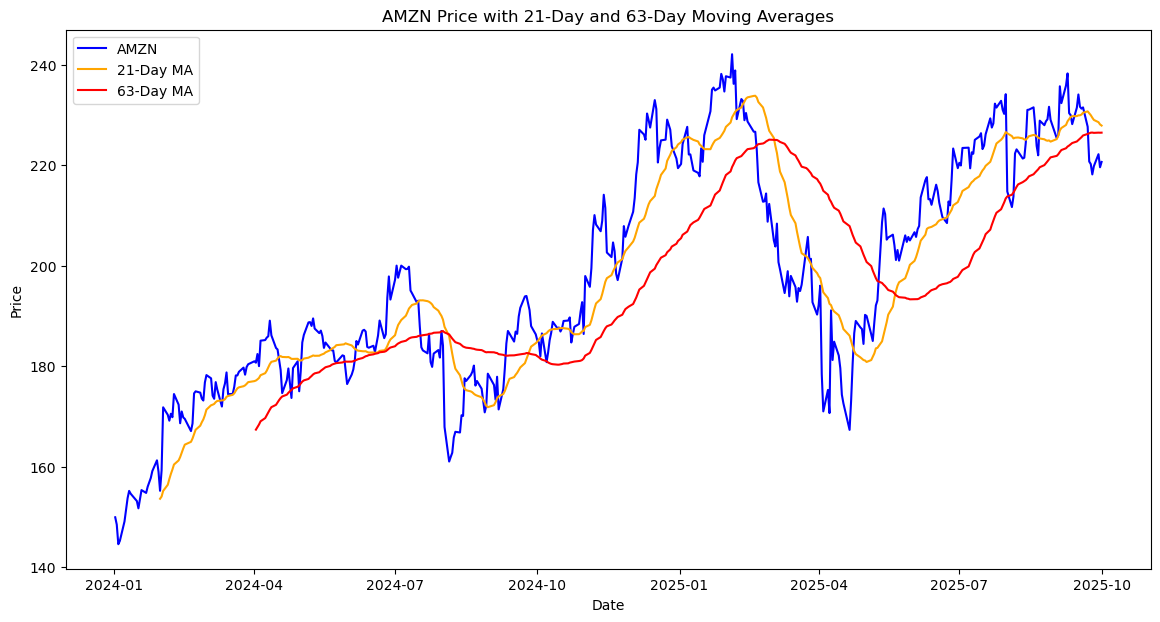

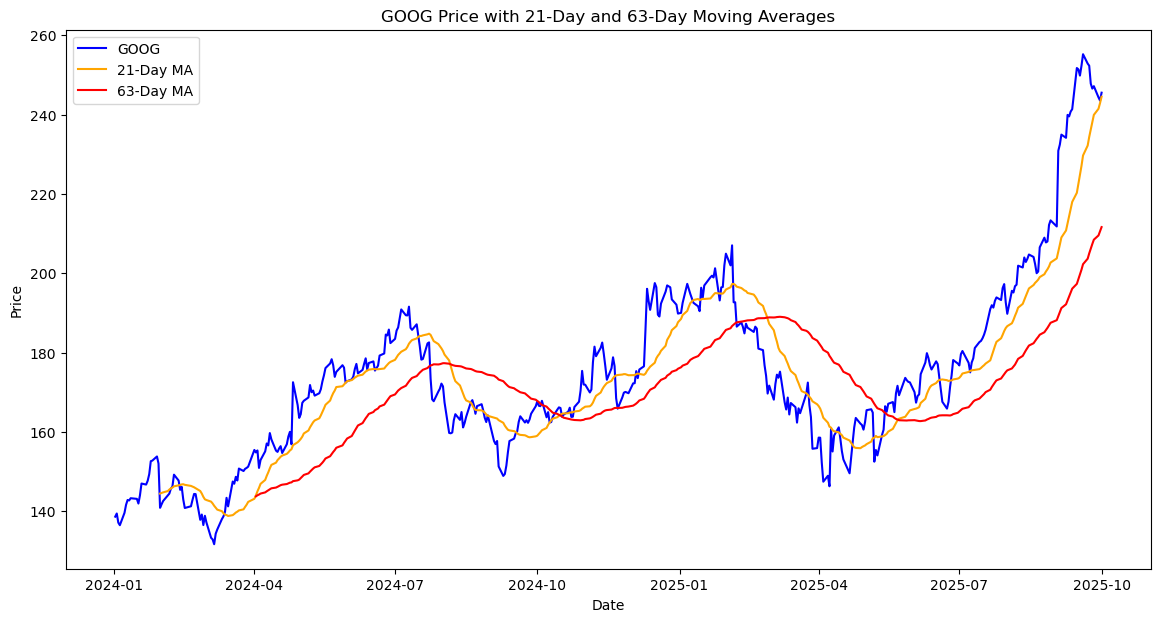

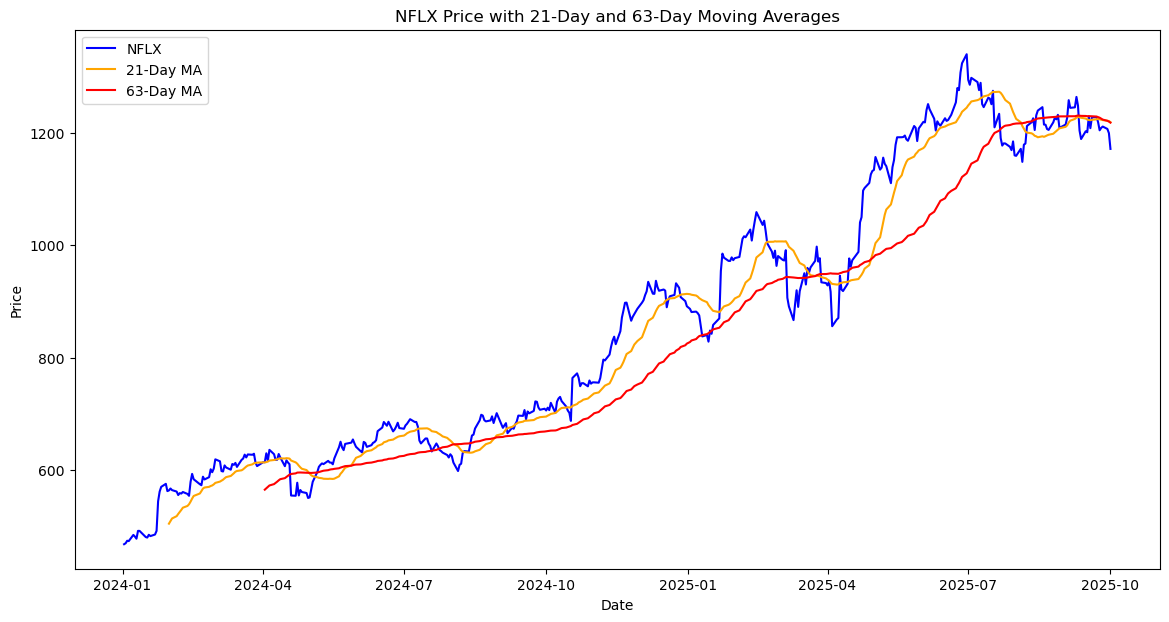

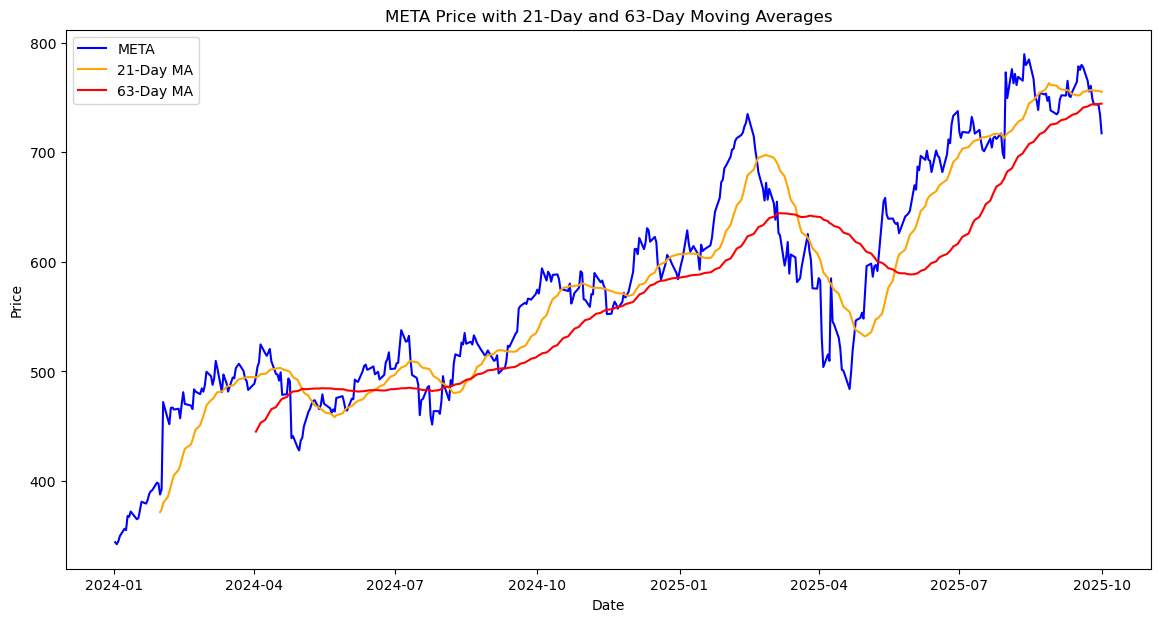

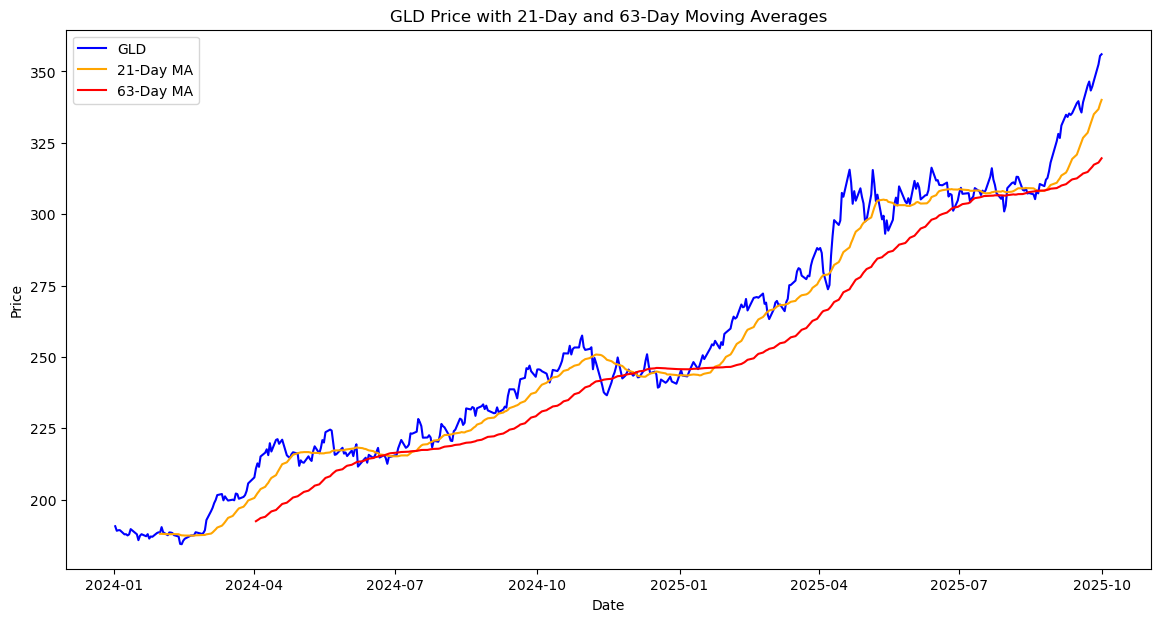

In [14]:
# Moving averages in 1 month and 3 months

mo_21 = data.rolling(window=21).mean() # 21 trading days in a months
mo_63 = data.rolling(window=63).mean() # 63 trading days in 3 months
for ticker in tickers:
    plt.rcParams['figure.figsize'] = (14, 7)
    plt.plot(data.index, data[ticker], label=ticker, color='blue')
    plt.plot(mo_21.index, mo_21[ticker], label='21-Day MA', color='orange')
    plt.plot(mo_63.index, mo_63[ticker], label='63-Day MA', color='red')
    plt.title(f'{ticker} Price with 21-Day and 63-Day Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

Bollinger Bands - A volatility indicator that consists of a moving average and two standard deviation lines above and below it.

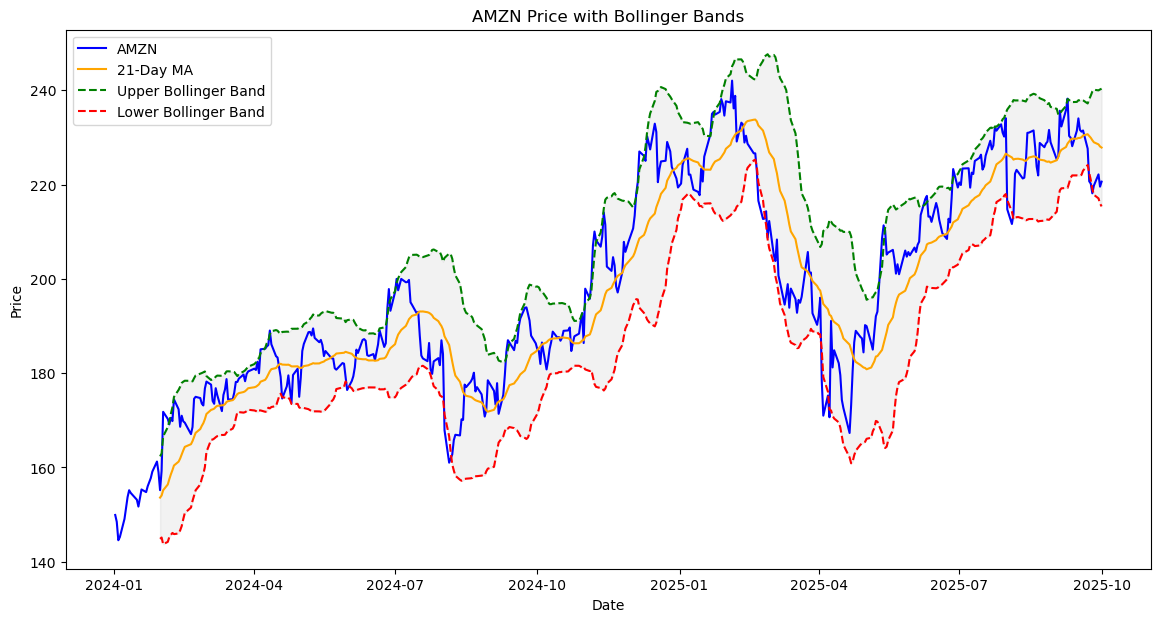

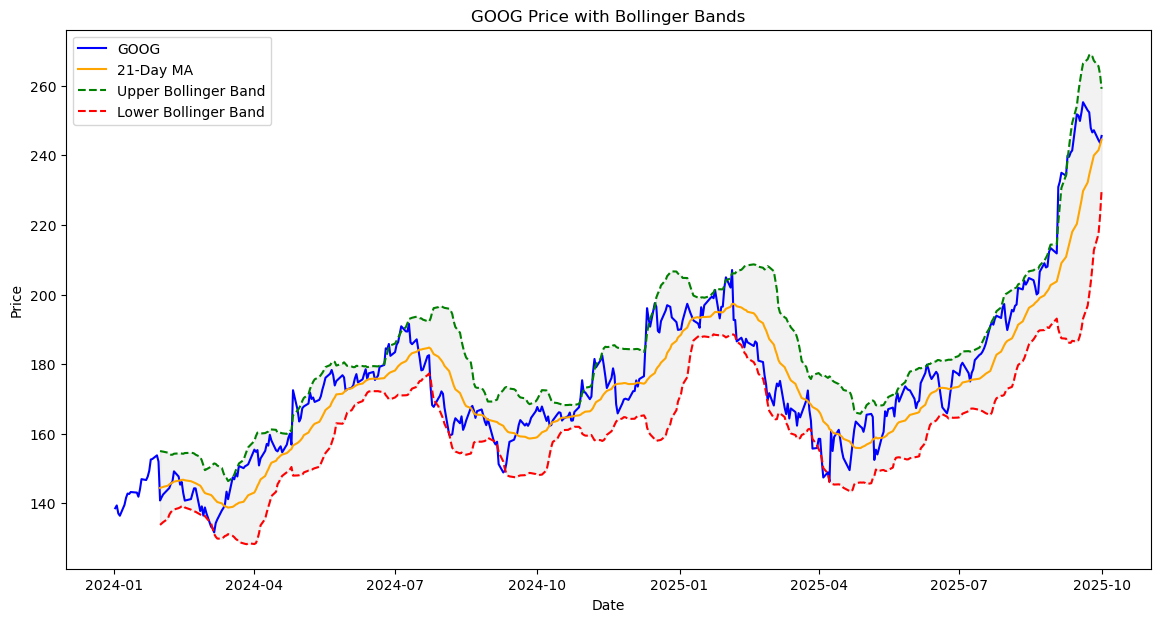

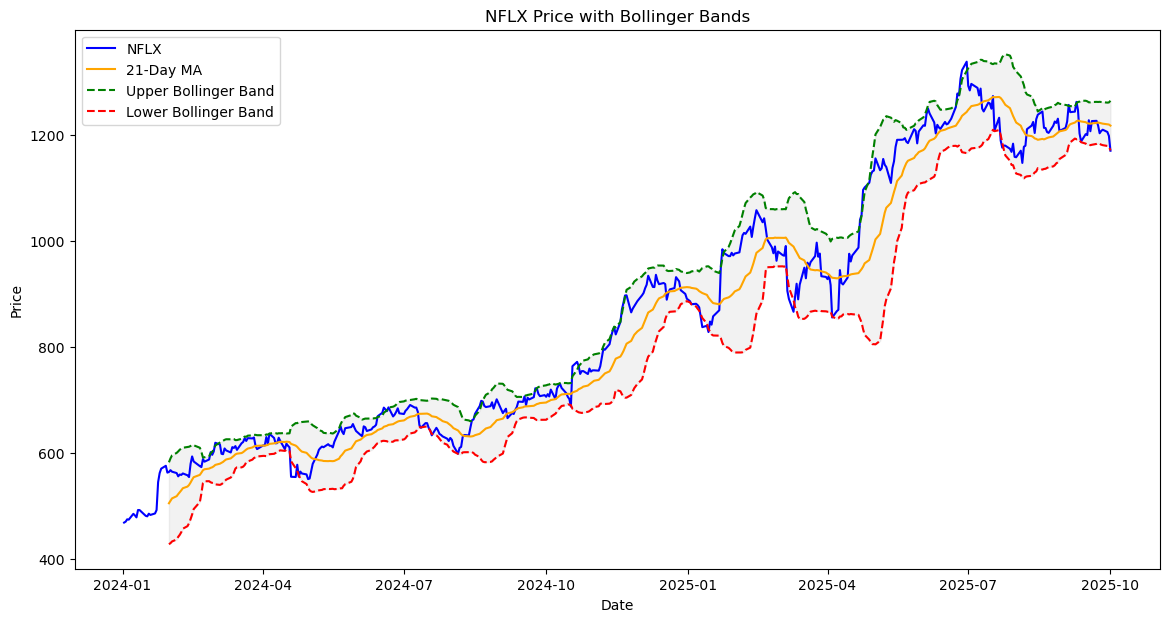

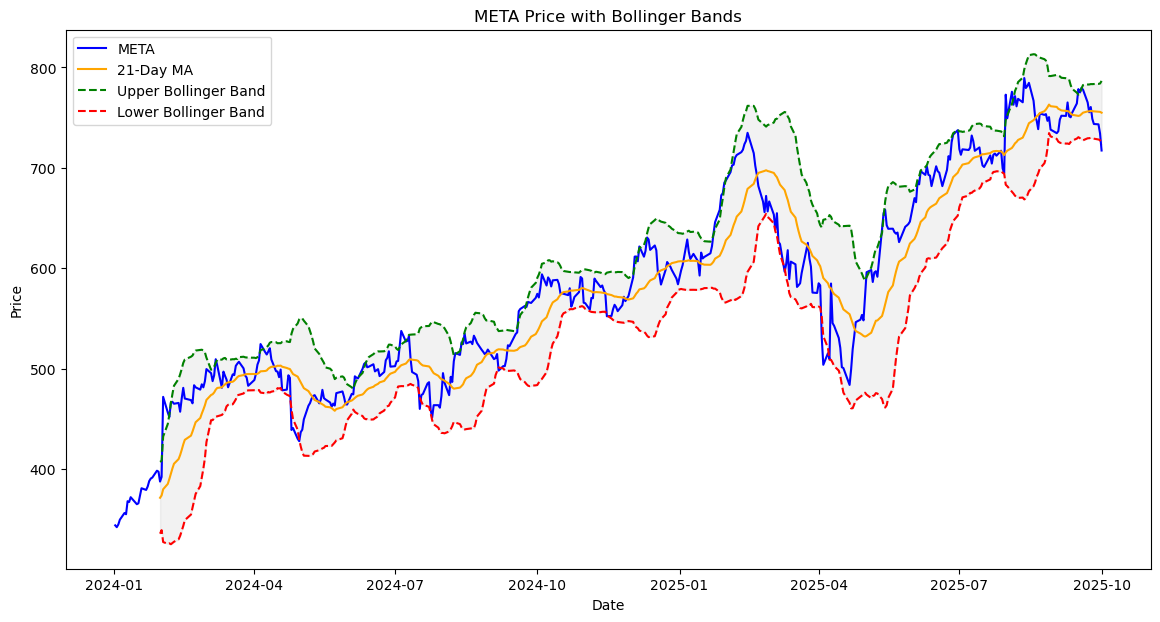

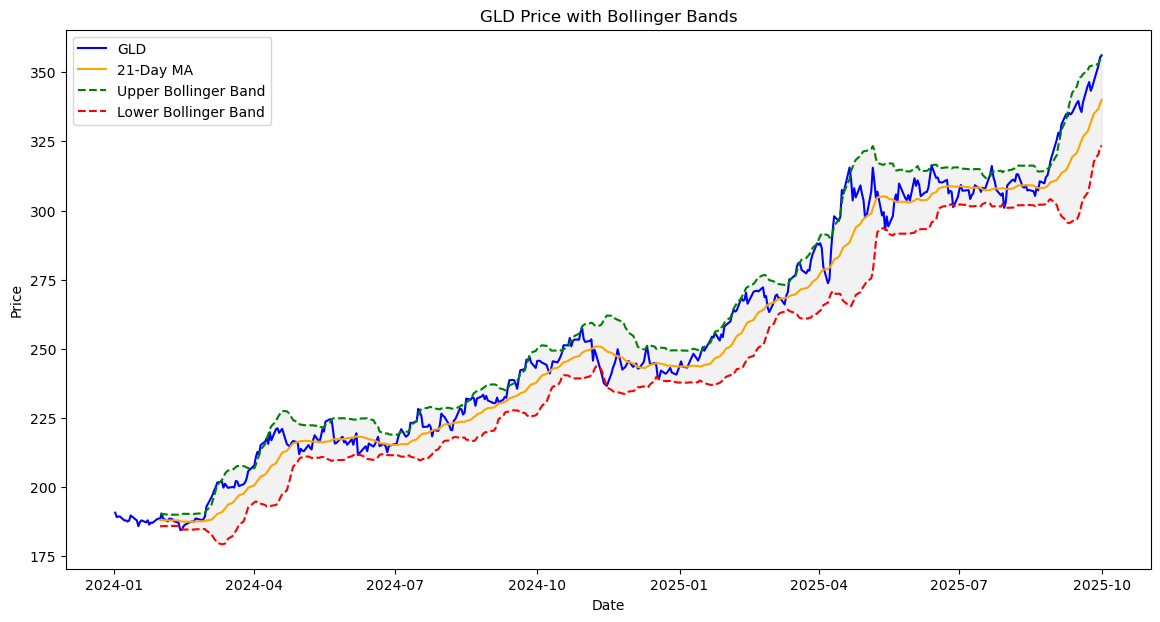

In [15]:
# The standard deviation in 21 days
std_21 = data.rolling(window=21).std()
upper_band = mo_21 + (std_21 * 2)
lower_band = mo_21 - (std_21 * 2)
for ticker in tickers:
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data[ticker], label=ticker, color='blue')
    plt.plot(mo_21.index, mo_21[ticker], label='21-Day MA', color='orange')
    plt.plot(upper_band.index, upper_band[ticker], label='Upper Bollinger Band', color='green', linestyle='--')
    plt.plot(lower_band.index, lower_band[ticker], label='Lower Bollinger Band', color='red', linestyle='--')
    plt.fill_between(data.index, lower_band[ticker], upper_band[ticker], color='grey', alpha=0.1)
    plt.title(f'{ticker} Price with Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

RSI (Relative Strength Index) - A momentum oscillator that measures the speed and change of price movements, typically used to identify overbought or oversold conditions.

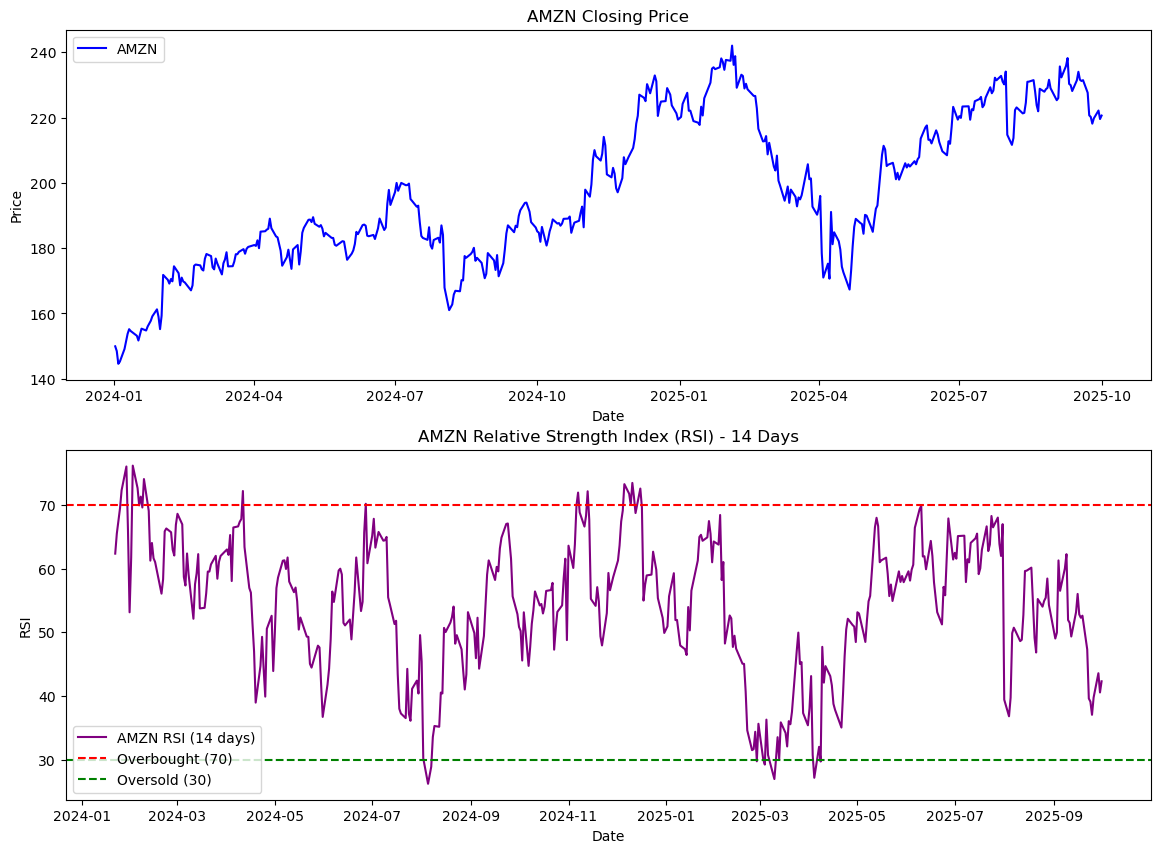

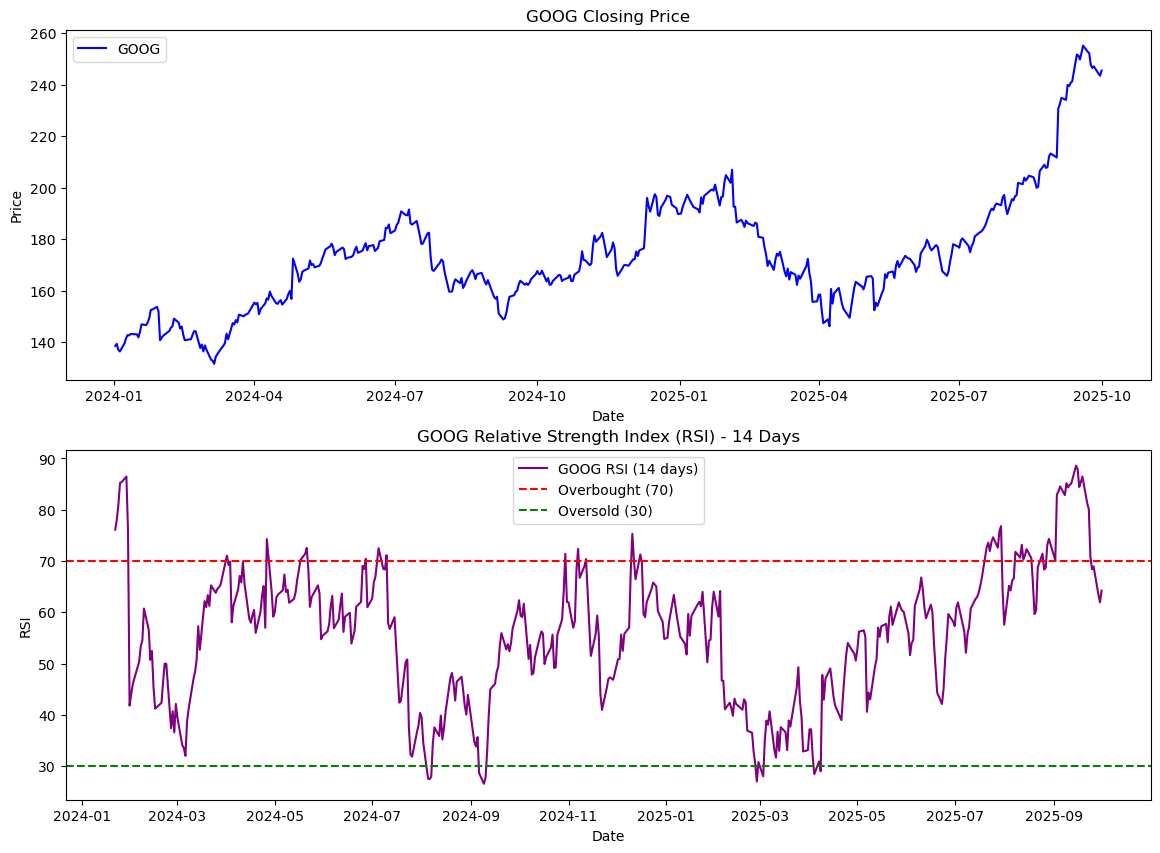

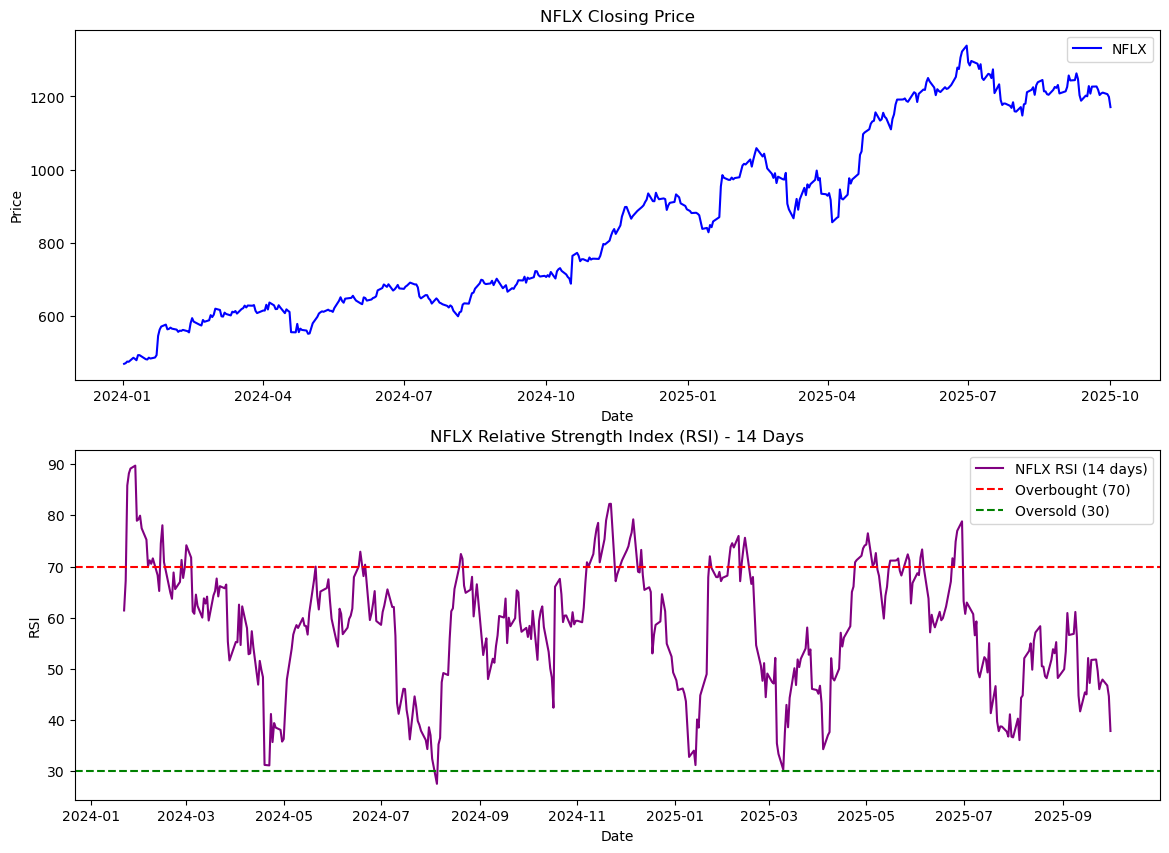

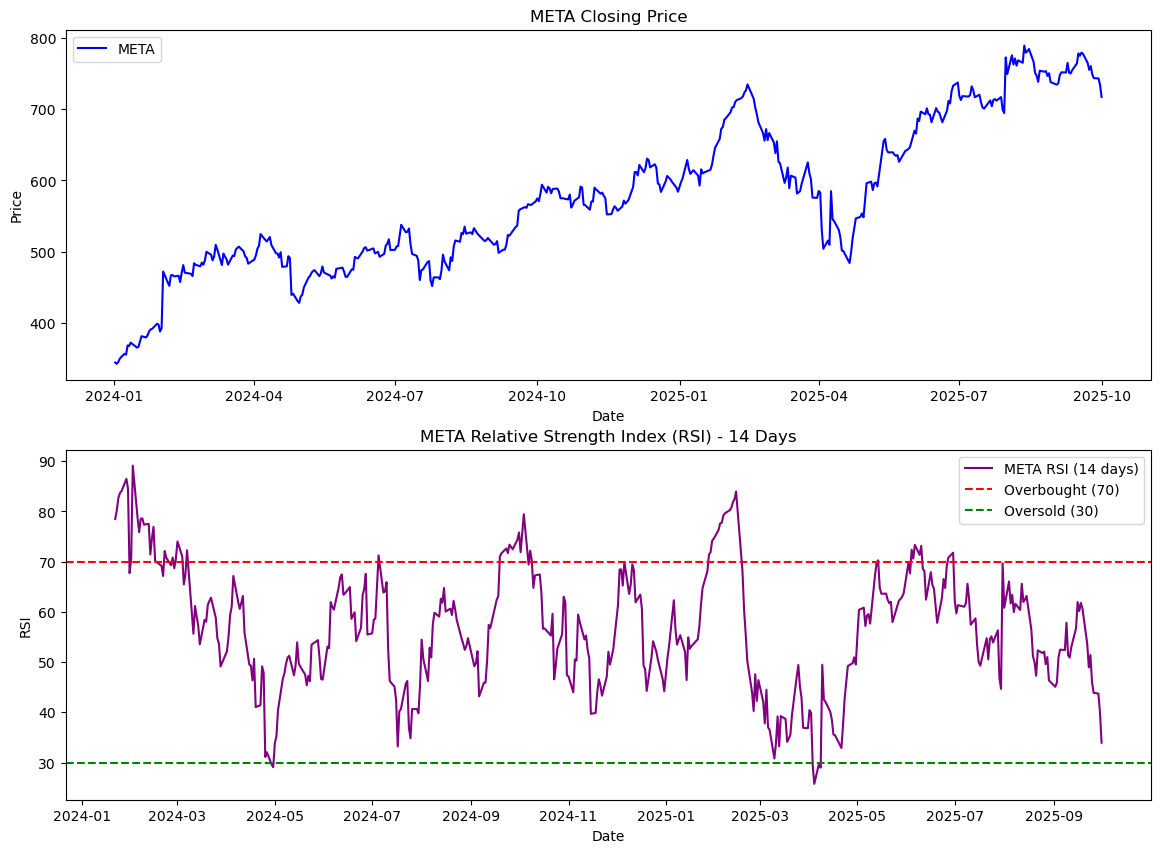

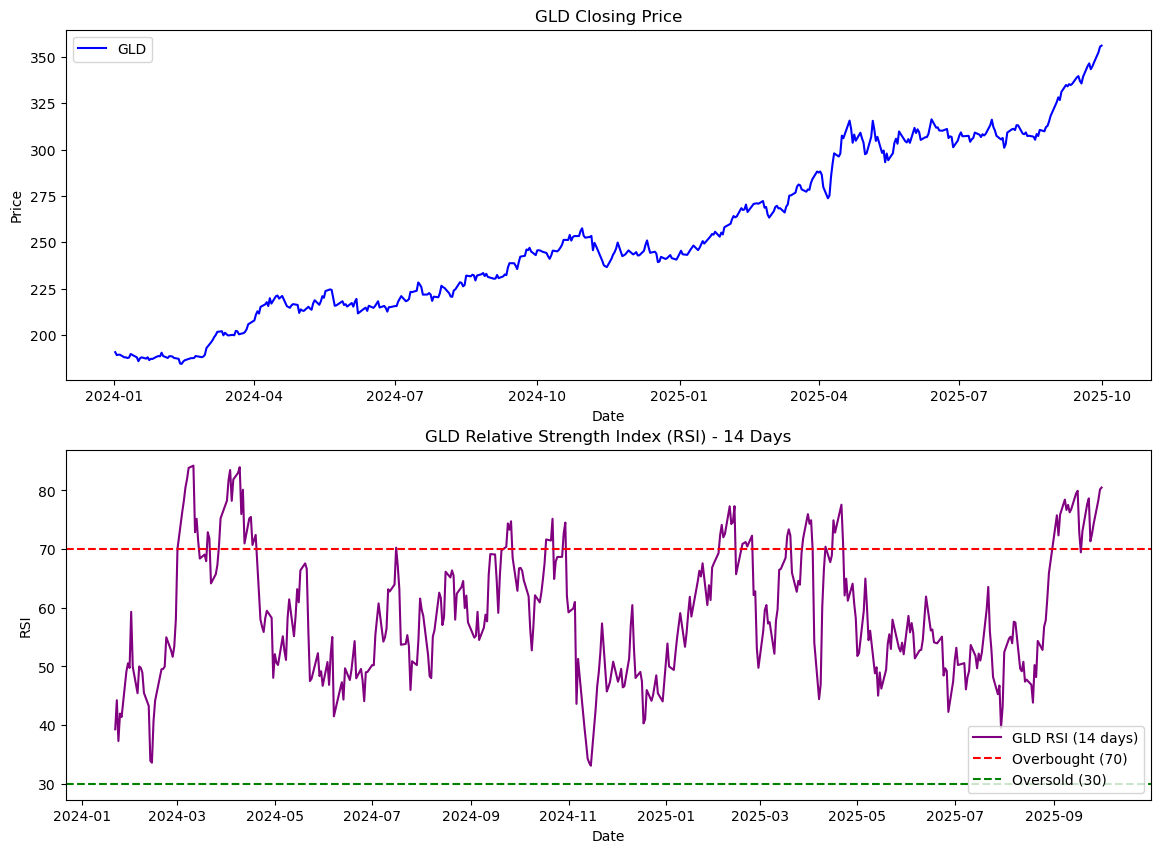

In [16]:
# Momentum (RSI) for 14 days for each ticker
momentum_14 = pd.DataFrame({ticker: ta.momentum.rsi(data[ticker], window=14) for ticker in data.columns})
momentum_14.dropna()
# Plot RSI for each ticker
for ticker in tickers:
    fig, ax = plt.subplots(2,1, figsize=(14, 10))
    plt.subplot(2,1,1)
    plt.plot(data.index, data[ticker], label=ticker, color='blue')
    plt.title(f'{ticker} Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(momentum_14.index, momentum_14[ticker], label=f'{ticker} RSI (14 days)', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{ticker} Relative Strength Index (RSI) - 14 Days')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

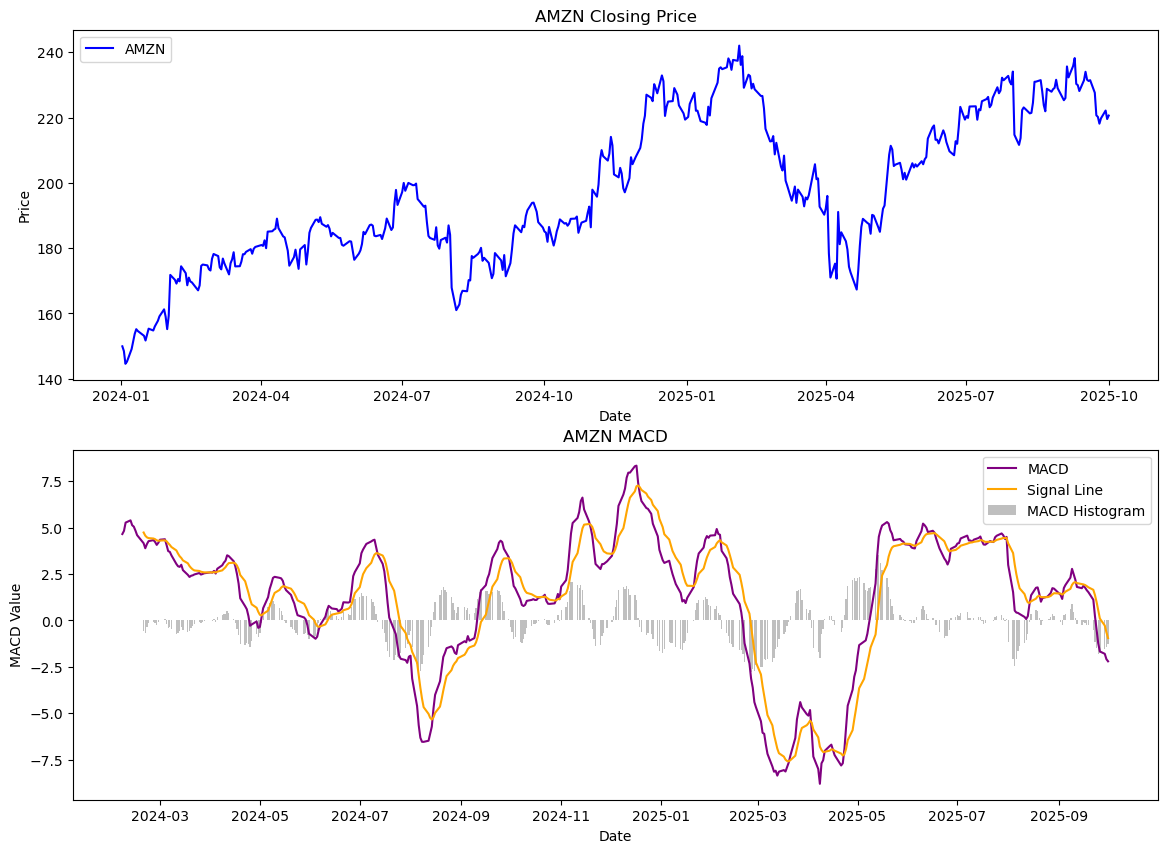

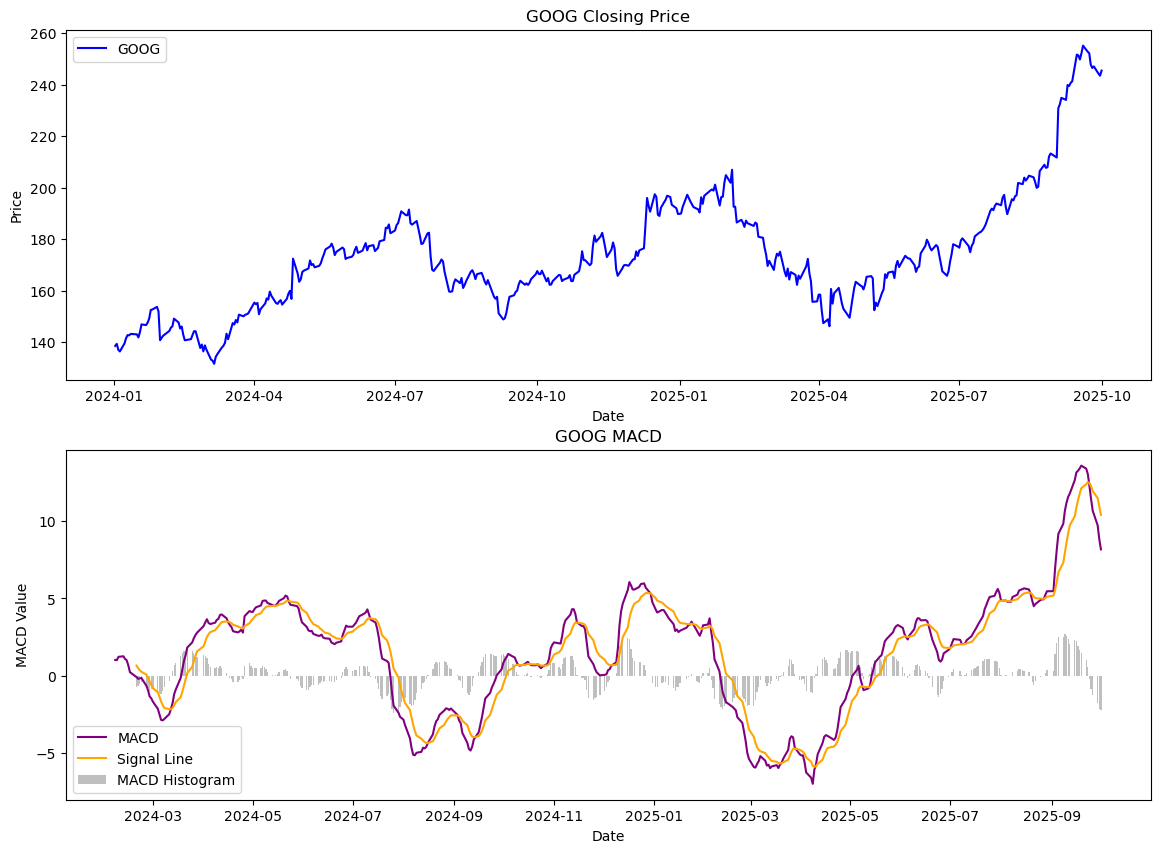

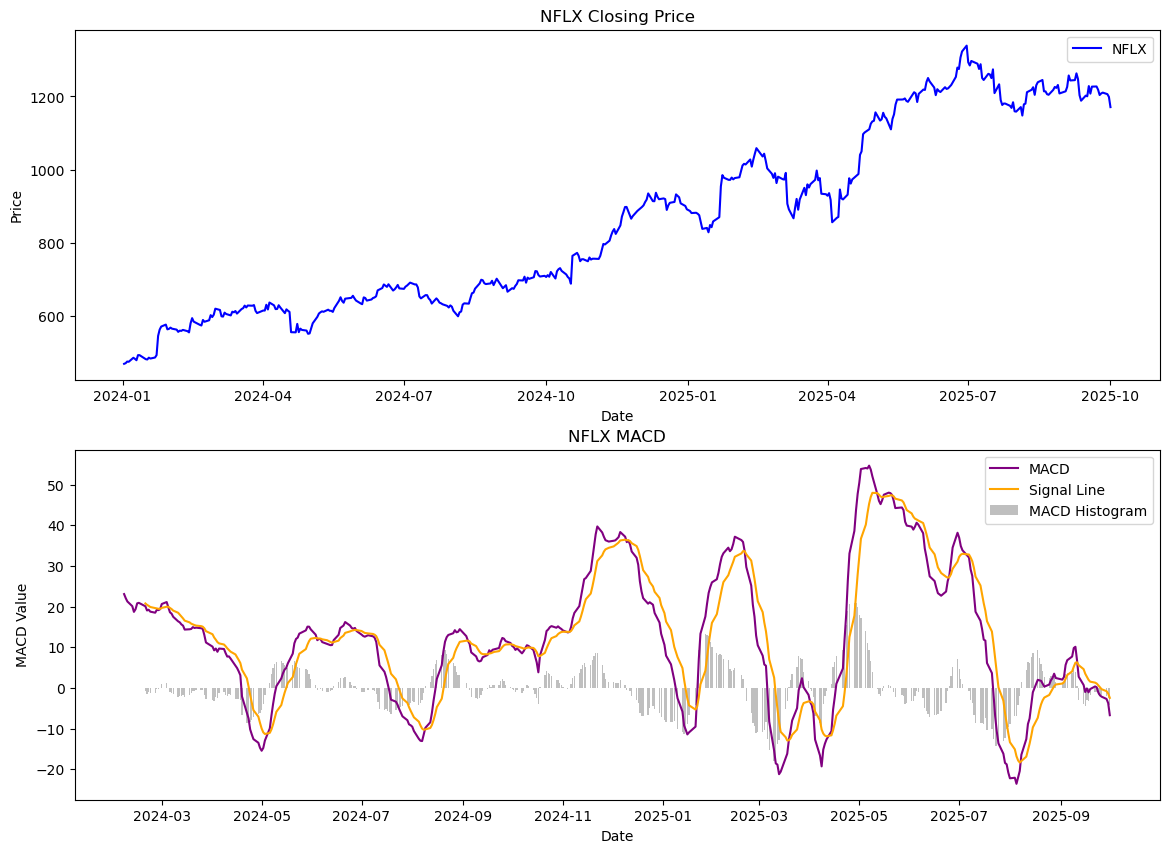

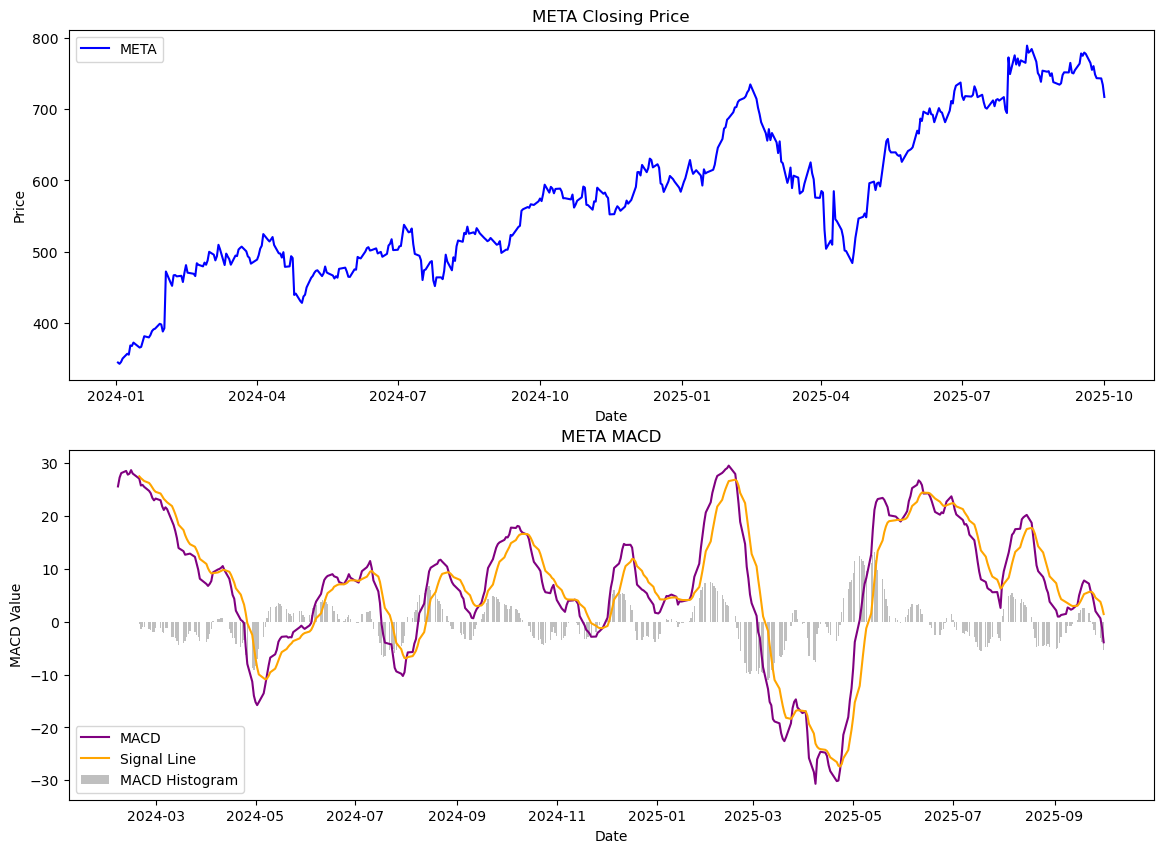

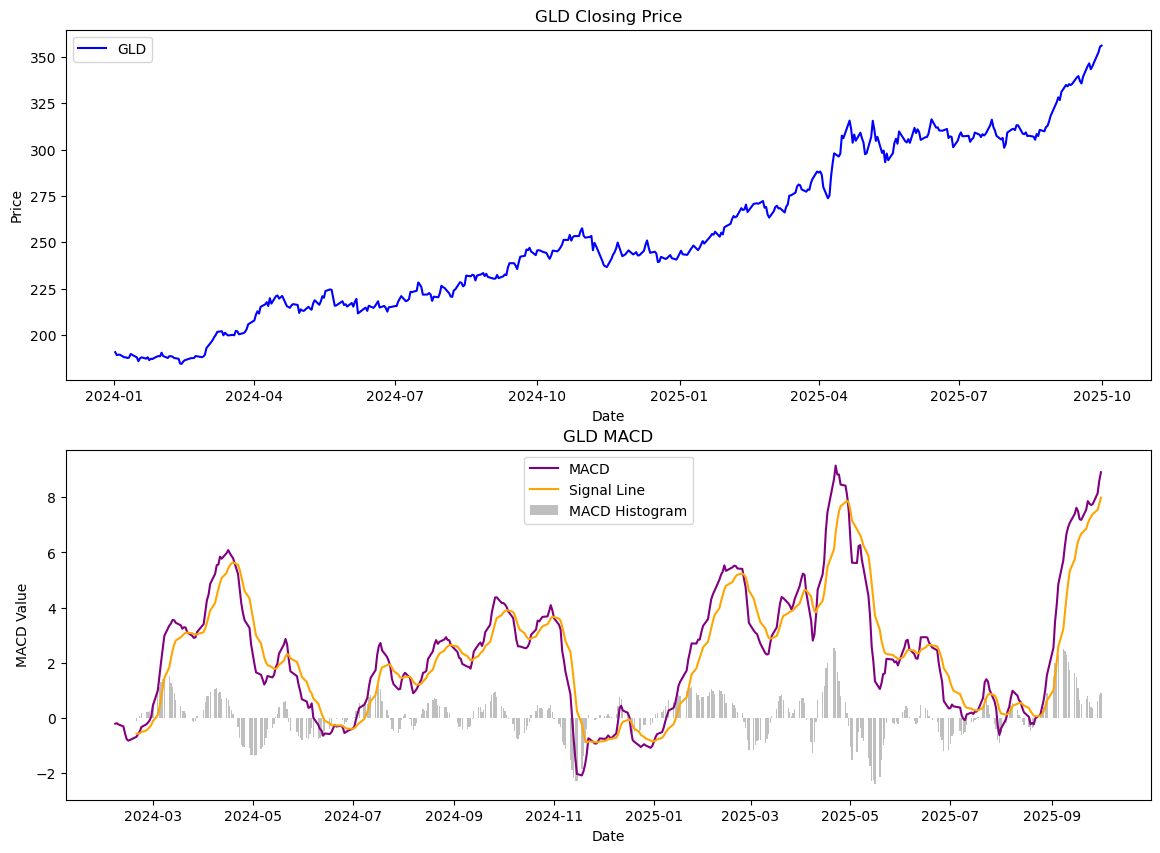

In [17]:
# MACD for each ticker
macd = pd.DataFrame({ticker: ta.trend.macd(data[ticker]) for ticker in data.columns})
macd_signal = pd.DataFrame({ticker: ta.trend.macd_signal(data[ticker]) for ticker in data.columns})
macd_diff = pd.DataFrame({ticker: ta.trend.macd_diff(data[ticker]) for ticker in data.columns})
# Plot MACD for each ticker
for ticker in tickers:
    fig, ax = plt.subplots(2,1, figsize=(14, 10))
    plt.subplot(2,1,1)
    plt.plot(data.index, data[ticker], label=ticker, color='blue')
    plt.title(f'{ticker} Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(macd.index, macd[ticker], label='MACD', color='purple')
    plt.plot(macd_signal.index, macd_signal[ticker], label='Signal Line', color='orange')
    plt.bar(macd_diff.index, macd_diff[ticker], label='MACD Histogram', color='grey', alpha=0.5)
    plt.title(f'{ticker} MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.show()

[*********************100%***********************]  5 of 5 completed


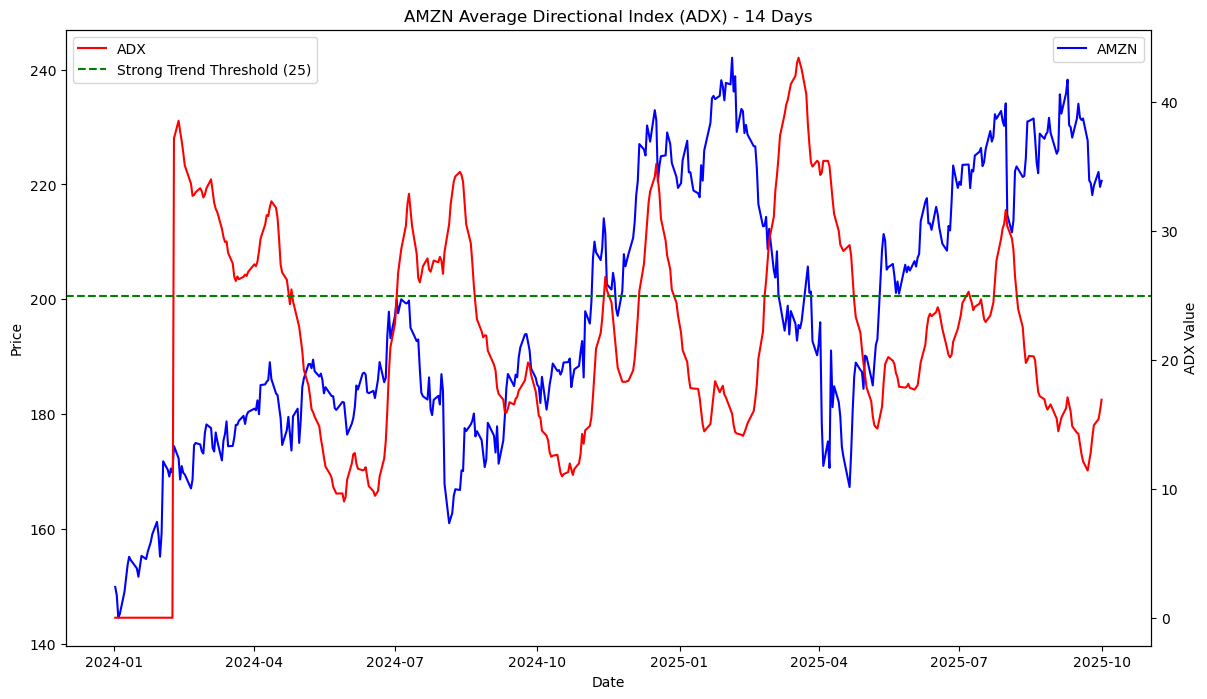

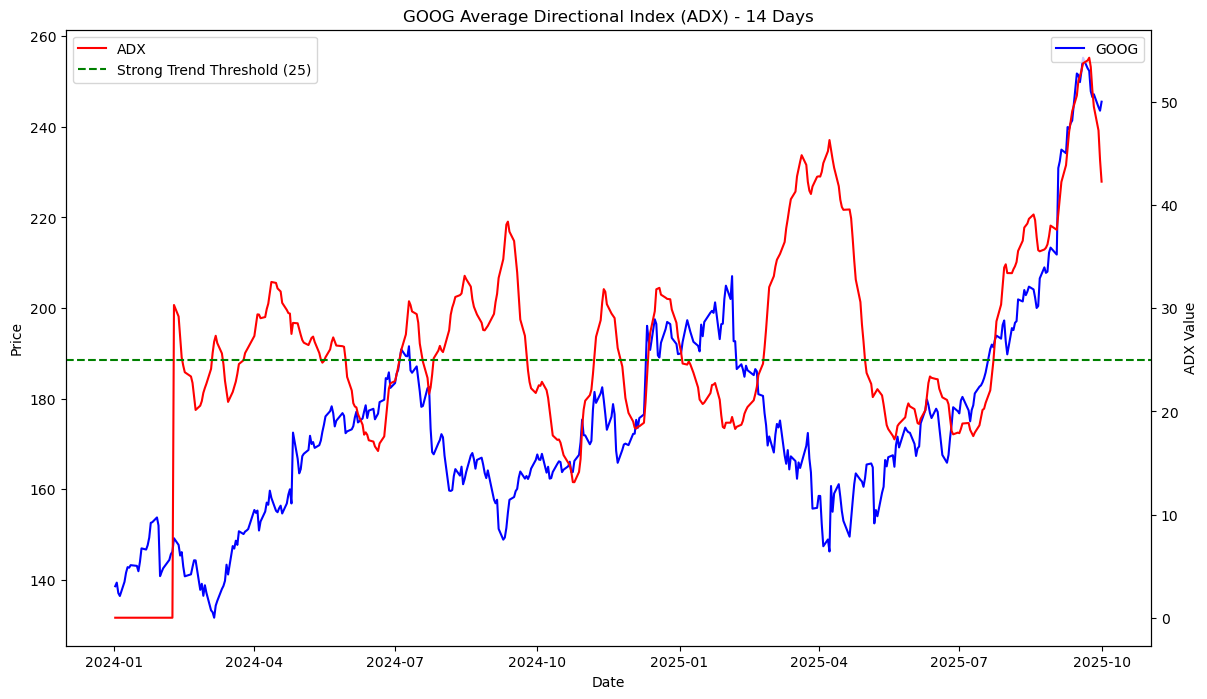

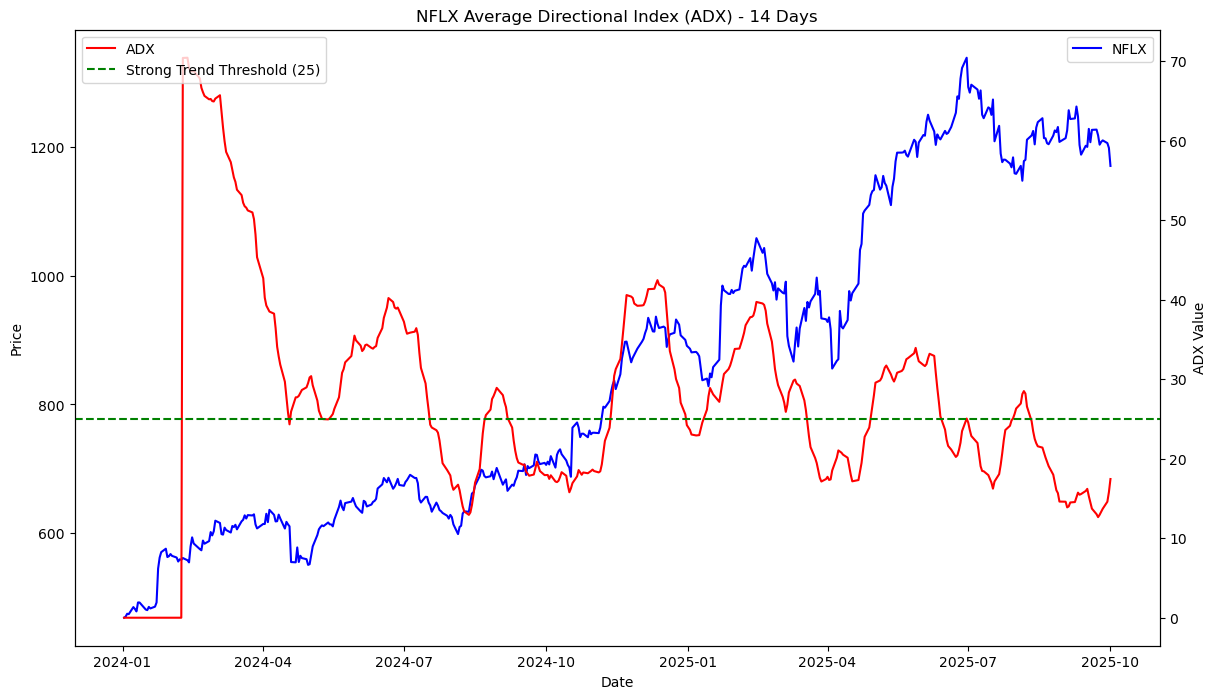

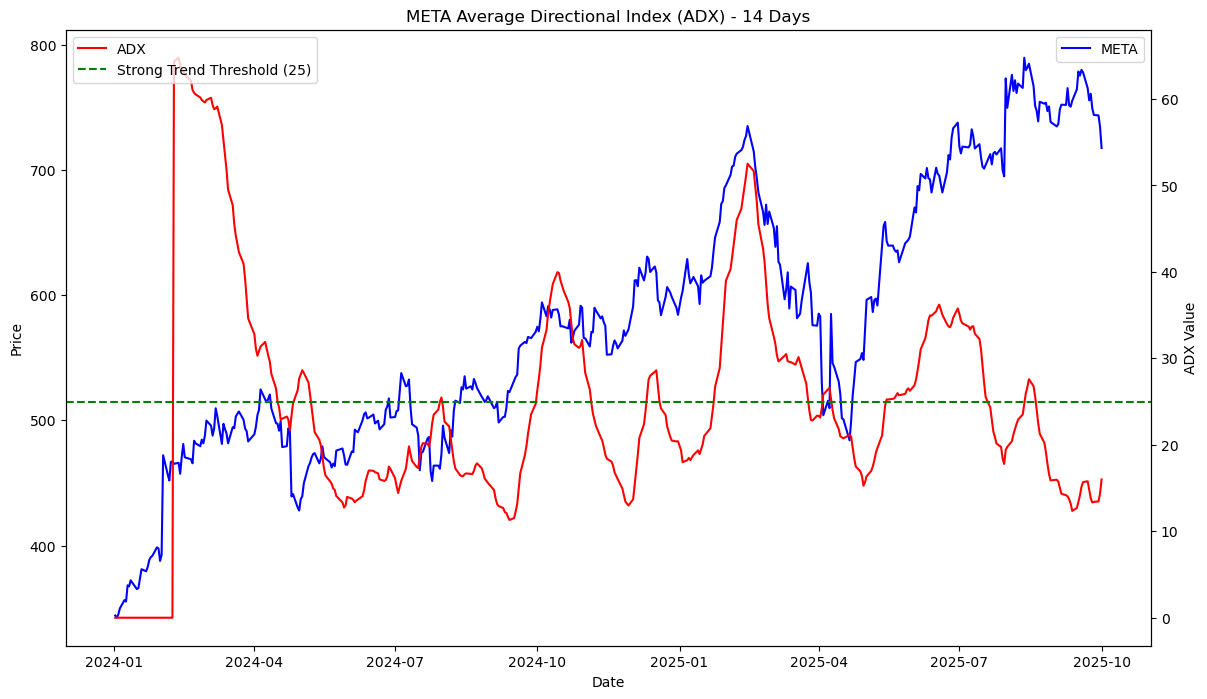

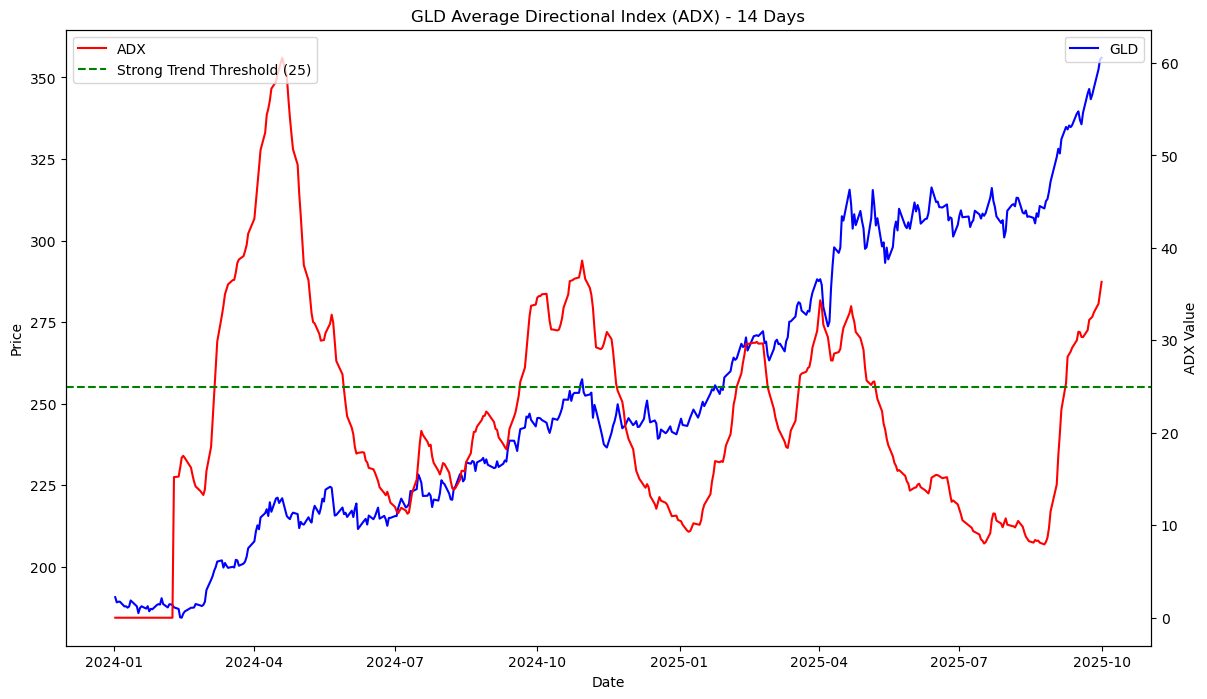

In [22]:
# Download OHLC data for ADX calculation
ohlc_data = yf.download(tickers, start=start, end=end, auto_adjust=True)[['High', 'Low', 'Close']]

# Calculate ADX for each ticker
adx = pd.DataFrame({
    ticker: ta.trend.adx(
        ohlc_data['High'][ticker],
        ohlc_data['Low'][ticker],
        ohlc_data['Close'][ticker],
        window=14
    )
    for ticker in tickers
})

# Plot ADX for each ticker
for ticker in tickers:
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax1.plot(data.index, data[ticker], label=ticker, color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    #ax1.set_title(f'{ticker} Closing Price')
    ax1.legend(loc='upper right')

    ax2 = ax1.twinx()
    ax2.plot(adx.index, adx[ticker], label='ADX', color='red')
    ax2.axhline(25, color='green', linestyle='--', label='Strong Trend Threshold (25)')
    ax2.set_ylabel('ADX Value')
    ax2.set_title(f'{ticker} Average Directional Index (ADX) - 14 Days')
    ax2.legend(loc='upper left')

    plt.show()

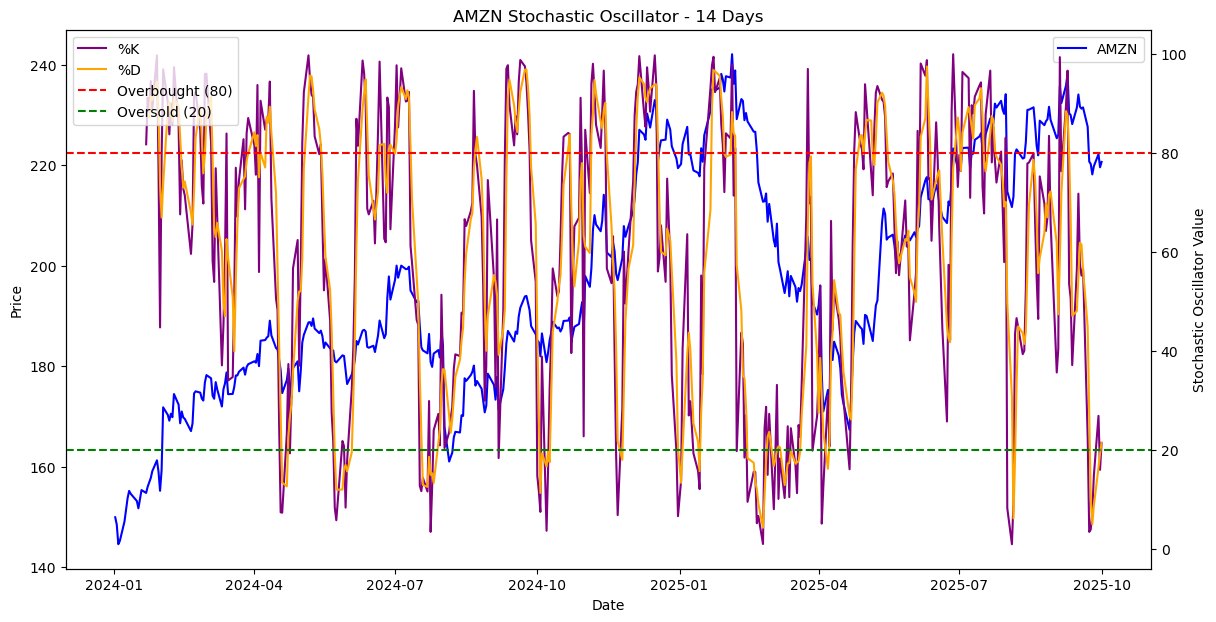

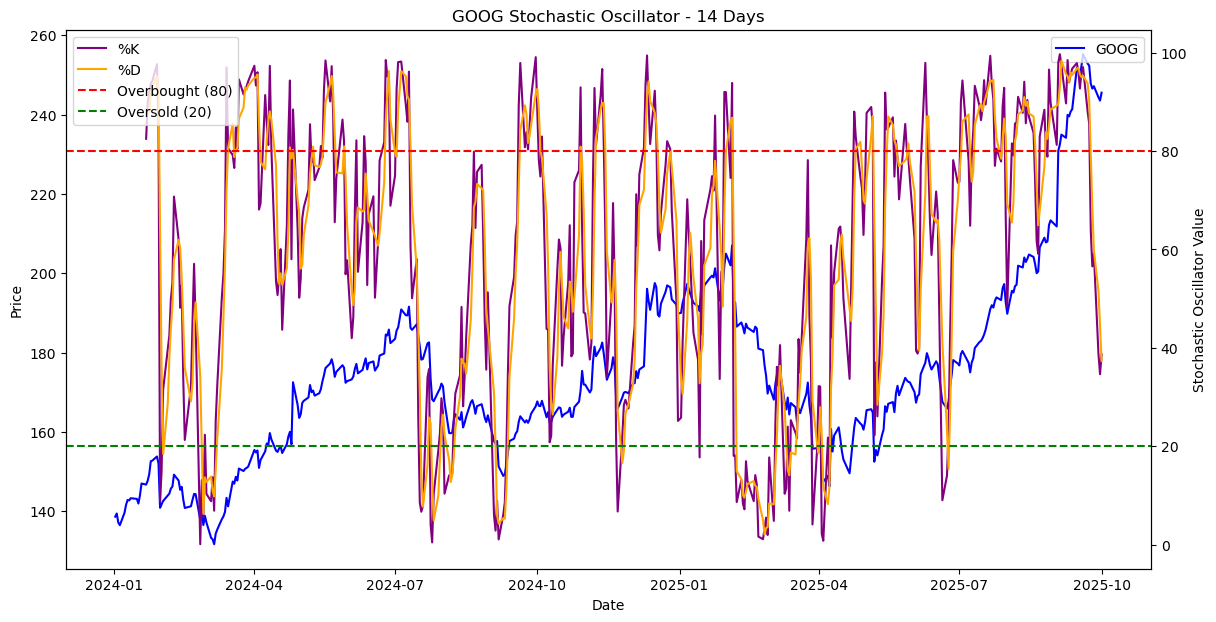

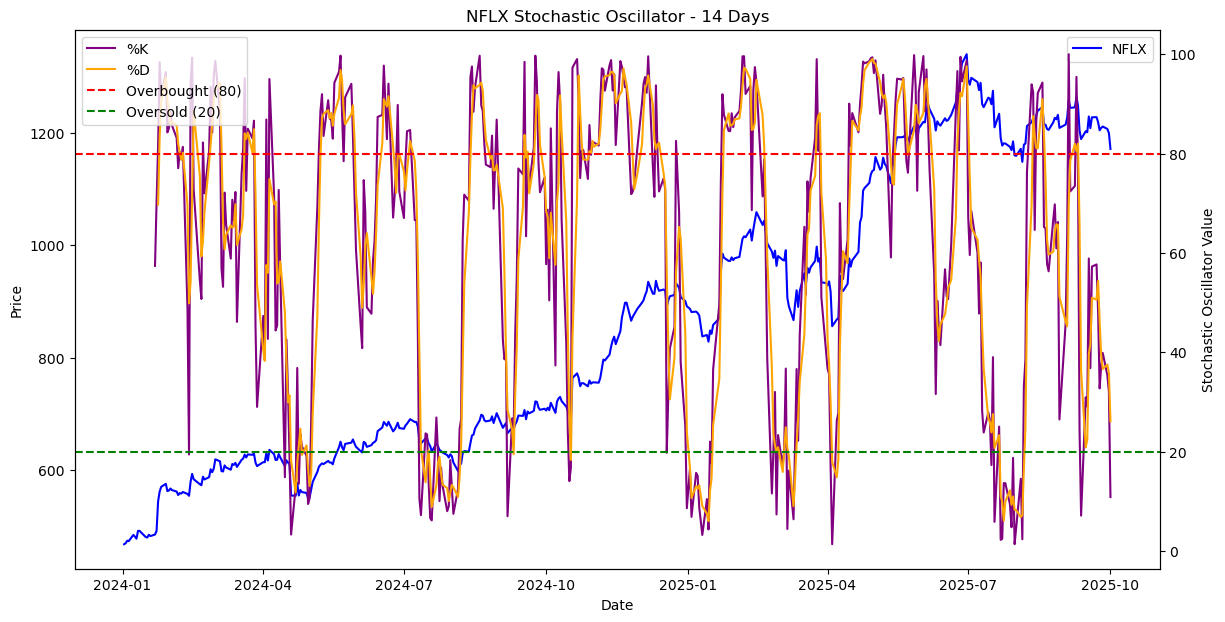

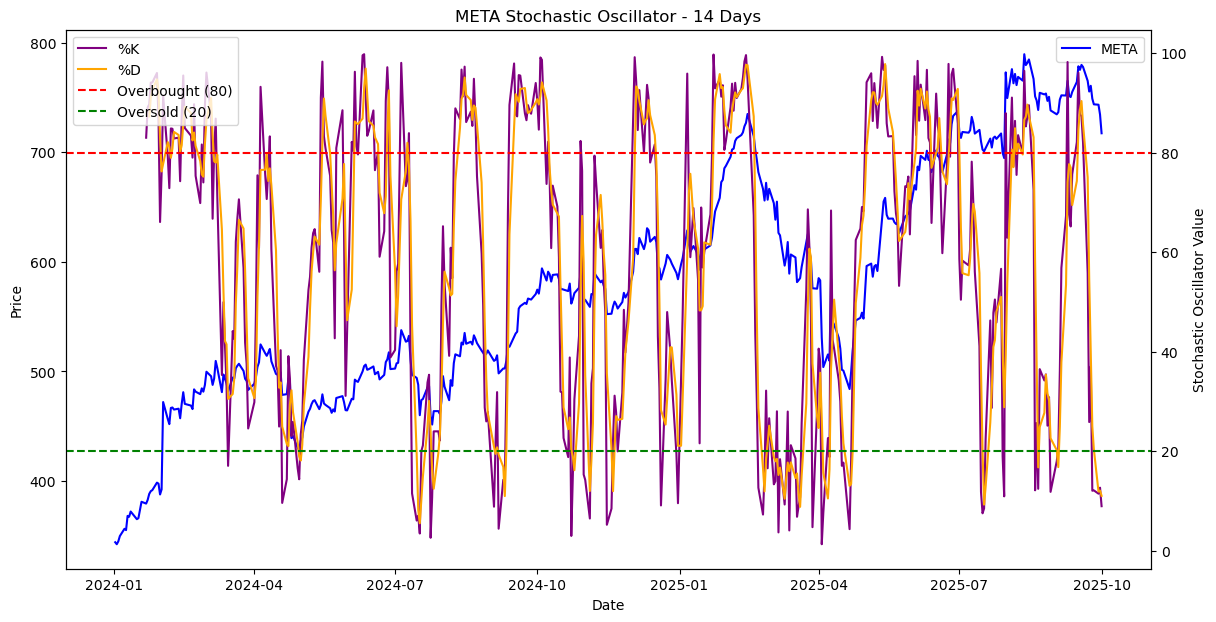

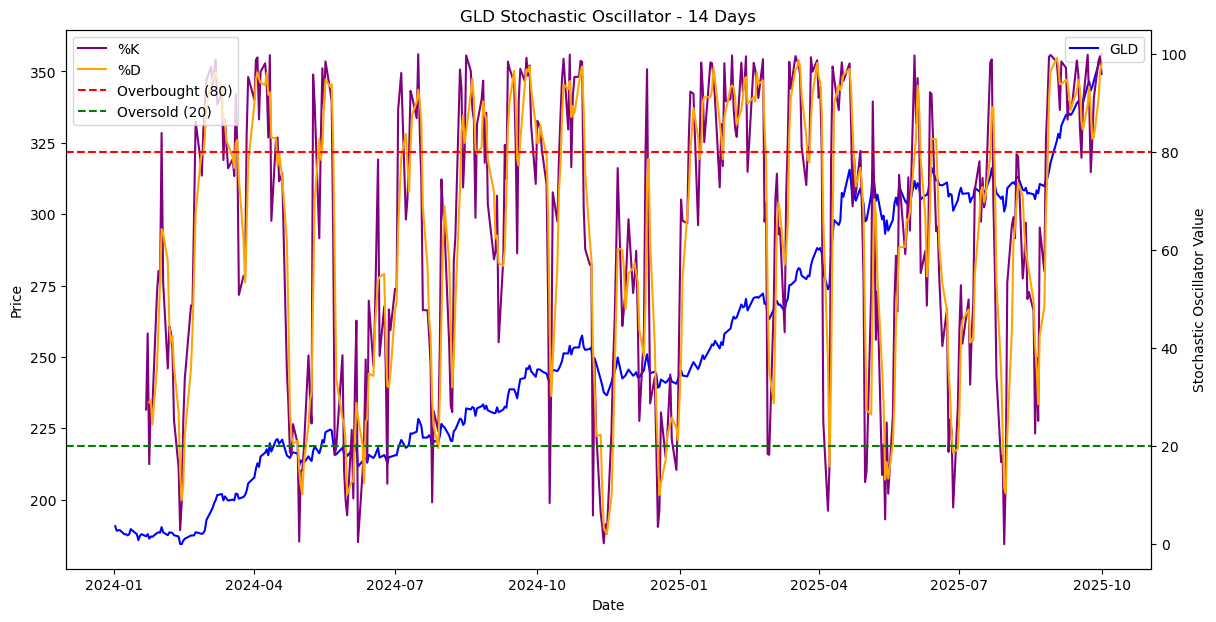

In [23]:
# Stochastic Oscillator for each ticker
stoch_k = pd.DataFrame({ticker: ta.momentum.stoch(ohlc_data['High'][ticker], ohlc_data['Low'][ticker], ohlc_data['Close'][ticker], window=14, smooth_window=3) for ticker in tickers})
stoch_d = pd.DataFrame({ticker: ta.momentum.stoch_signal(ohlc_data['High'][ticker], ohlc_data['Low'][ticker], ohlc_data['Close'][ticker], window=14, smooth_window=3) for ticker in tickers})
# Plot Stochastic Oscillator for each ticker
for ticker in tickers:
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.plot(data.index, data[ticker], label=ticker, color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    #ax1.set_title(f'{ticker} Closing Price')
    ax1.legend(loc='upper right')

    ax2 = ax1.twinx()
    ax2.plot(stoch_k.index, stoch_k[ticker], label='%K', color='purple')
    ax2.plot(stoch_d.index, stoch_d[ticker], label='%D', color='orange')
    ax2.axhline(80, color='red', linestyle='--', label='Overbought (80)')
    ax2.axhline(20, color='green', linestyle='--', label='Oversold (20)')
    ax2.set_ylabel('Stochastic Oscillator Value')
    ax2.set_title(f'{ticker} Stochastic Oscillator - 14 Days')
    ax2.legend(loc='upper left')

    plt.show()